<a href="https://colab.research.google.com/github/yubin0727/captcha_recognition/blob/main/Captcha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!nvidia-smi

Mon Nov 21 12:10:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [70]:
import os
import cv2
from glob import glob
from google.colab.patches import cv2_imshow
import numpy as np

data_list = glob('sample_data/samples/*.png')
len_data = len(data_list)
print(len(data_list))

1040


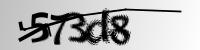

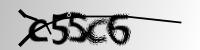

['c' '5' '5' 'c' '6']
(1040, 50, 200, 1)


In [183]:
img = cv2.imread(data_list[0], cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

data_height = 50
data_width = 200
n_channel = 1

images = np.zeros((len_data, data_height, data_width, n_channel))
label = np.empty((len_data, 5), dtype = str)
for n, path in enumerate(data_list):
  image = cv2.imread(data_list[n], cv2.IMREAD_GRAYSCALE)
  image = np.reshape(image, (data_height, data_width, n_channel))
  images[n, :, :, :] = image
  path = path.split('/')[2]
  path = path.split('.')[0]
  path = list(path)
  label[n] = np.array(path)

cv2_imshow(images[3])
print(label[3])
print(images.shape)

In [180]:
from string import ascii_lowercase, digits
characters = list(digits) + list(ascii_lowercase)
print(characters)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [185]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

char_to_num = layers.experimental.preprocessing.StringLookup(vocabulary=characters, num_oov_indices=0, mask_token=None)
num_to_char = layers.experimental.preprocessing.StringLookup(vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True)
char_to_num(label[3])

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([12,  5,  5, 12,  6])>